<a href="https://colab.research.google.com/github/mishelks/algerian-forest/blob/main/algerian_forest_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [150]:
df=pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [151]:
# Checking for missing values
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [153]:
# Forward fill for missing values in features
df.fillna(method='ffill', inplace=True)

In [154]:
# Drop any duplicates if they exist
df = df.drop_duplicates()


In [155]:
# Normalize or standardize numeric features if necessary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [156]:
# Trim whitespace from the 'Classes' column
df['Classes'] = df['Classes'].str.strip()
df
# Create a new column 'Class_Binary'
df['Class_Binary'] = df['Classes'].map({'not fire': 0, 'fire': 1})

# Check for any NaN values in the new binary column
print("Missing values in 'Class_Binary':", df['Class_Binary'].isnull().sum())

df

Missing values in 'Class_Binary': 0


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Class_Binary
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,0


In [157]:
#Select relevant features for the model
features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
X = df[features]

# Target variable
y = df['Class_Binary']

# Preview selected features and target variable
print("Features (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())

Features (X):
   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5

Target Variable (y):
0    0
1    0
2    0
3    0
4    0
Name: Class_Binary, dtype: int64


EXPLORATORY DATA ANALYSIS

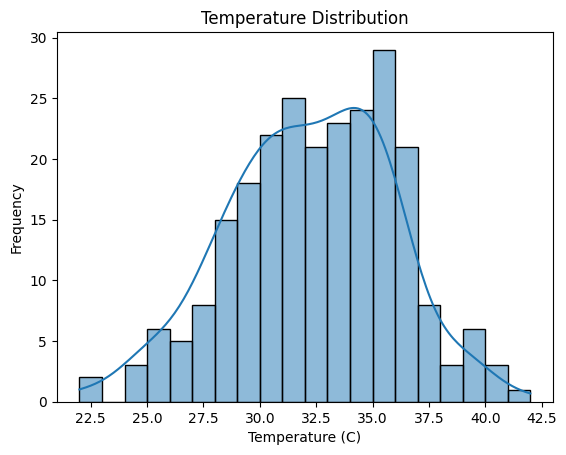

In [158]:
sns.histplot(df['Temperature'], bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.show()


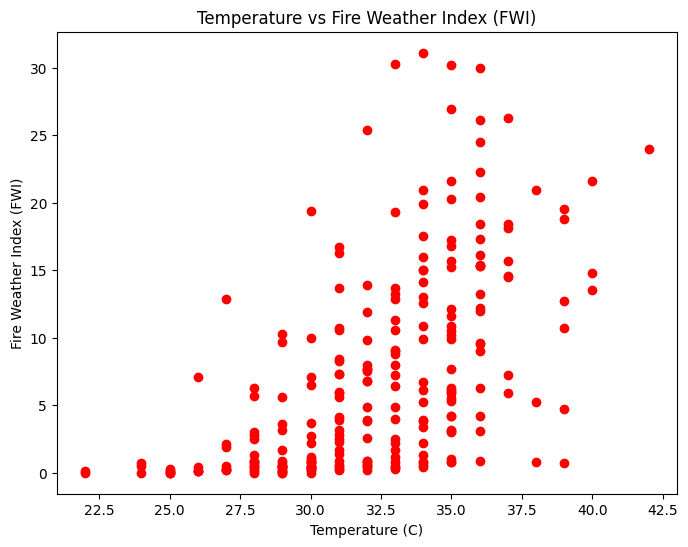

In [159]:
plt.figure(figsize=(8,6))
plt.scatter(df['Temperature'], df['FWI'], color='r')
plt.title('Temperature vs Fire Weather Index (FWI)')
plt.xlabel('Temperature (C)')
plt.ylabel('Fire Weather Index (FWI)')
plt.show()


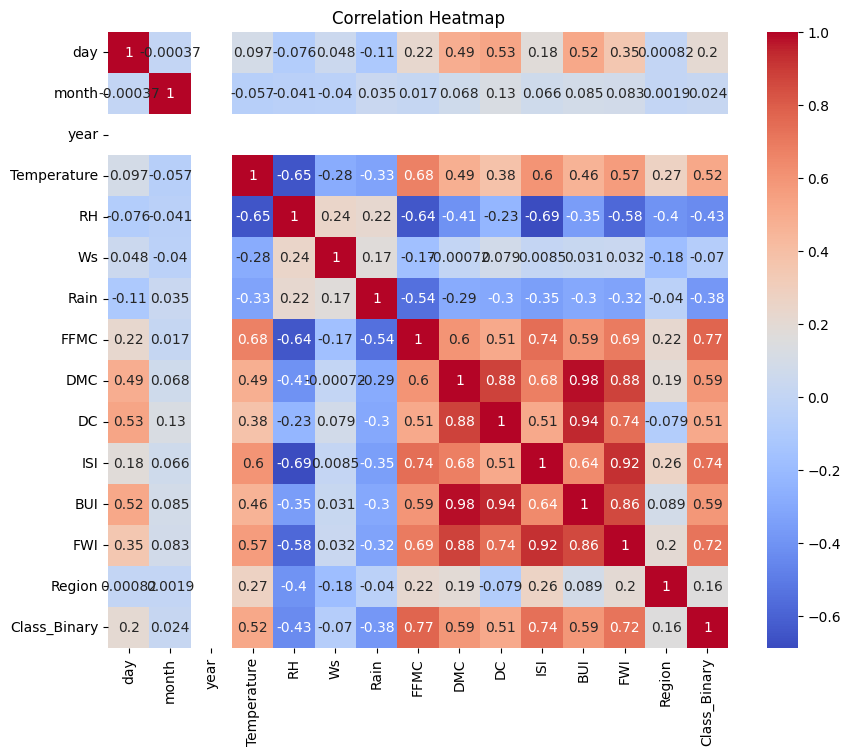

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for the correlation heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap to visualize feature relationships
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()





MODEL TRAINING

In [161]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [162]:
# Check the shapes of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(194, 10) (49, 10) (194,) (49,)


In [163]:
# Fill missing values in y_train
y_train.fillna(0, inplace=True)

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Train the multiple linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Linear Regression MSE:', mse)
print('Linear Regression R2:',r2 )


Linear Regression MSE: 0.08347238906971761
Linear Regression R2: 0.6625972960330102


In [165]:
# Create polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predictions and Evaluation
y_poly_pred = poly_model.predict(X_poly_test)
mse = mean_squared_error(y_test, y_poly_pred)
r2 = r2_score(y_test, y_poly_pred)
print('Polynomial Regression MSE:',mse )
print('Polynomial Regression R2:',r2 )


Polynomial Regression MSE: 0.2561336443085582
Polynomial Regression R2: -0.035314612769104636


In [166]:
# Ridge Regression
from sklearn.linear_model import Ridge, Lasso
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_ridge_pred = ridge_model.predict(X_test)
print('Ridge Regression MSE:', mean_squared_error(y_test, y_ridge_pred))
print('Ridge Regression R2:', r2_score(y_test, y_ridge_pred))

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_lasso_pred = lasso_model.predict(X_test)
print('Lasso Regression MSE:', mean_squared_error(y_test, y_lasso_pred))
print('Lasso Regression R2:', r2_score(y_test, y_lasso_pred))


Ridge Regression MSE: 0.08349263837629188
Ridge Regression R2: 0.6625154465631704
Lasso Regression MSE: 0.09512961337829835
Lasso Regression R2: 0.6154777748799758


CROSS VALIDATION AND HYPERTUNING

In [167]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV


# Define a grid of alpha values to search over
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Ridge Regression with Cross-Validation
ridge = Ridge()  # Initialize Ridge model
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)  # 5-fold cross-validation
ridge_cv.fit(X_train, y_train)  # Fit model on training data

# Print the best alpha and corresponding score for Ridge
print('Best Ridge alpha:', ridge_cv.best_params_['alpha'])
print('Best Ridge score :', ridge_cv.best_score_)

# Lasso Regression with Cross-Validation
lasso = Lasso()  # Initialize Lasso model
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)  # 5-fold cross-validation
lasso_cv.fit(X_train, y_train)  # Fit model on training data

# Print the best alpha and corresponding score for Lasso
print('Best Lasso alpha:', lasso_cv.best_params_['alpha'])
print('Best Lasso score :', lasso_cv.best_score_)


Best Ridge alpha: 100
Best Ridge score : 0.6818132274740784
Best Lasso alpha: 0.01
Best Lasso score : 0.6789636937686312


In [168]:
from sklearn.metrics import r2_score, mean_absolute_error


# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f'Linear Regression R²: {r2:.2f}, MAE: {mae:.2f}')


Linear Regression R²: 0.66, MAE: 0.25


MODEL SAVING

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and preprocess the dataset (as previously discussed)
df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')
df.fillna(method='ffill', inplace=True)
df['Classes'] = df['Classes'].str.strip()
df['Class_Binary'] = df['Classes'].map({'not fire': 0, 'fire': 1})
df.drop(columns=['Classes'], inplace=True)

# Feature selection
features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
X = df[features]
y = df['Class_Binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Step 2: Define the models and hyperparameters for tuning
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Hyperparameters for Ridge and Lasso
param_grid = {
    'Ridge Regression': {'alpha': [0.1, 1, 10, 100]},
    'Lasso Regression': {'alpha': [0.1, 1, 10, 100]}
}

# Step 3: Hyperparameter tuning function
def tune_model(model_name, model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Step 4: Perform hyperparameter tuning
best_models = {}
for name, model in models.items():
    if name in param_grid:
        best_model, best_params = tune_model(name, model, param_grid[name], X_train_scaled, y_train)
        best_models[name] = (best_model, best_params)
        print(f"{name} - Best Params: {best_params}")

# Step 5: Evaluate best models
for name, (model, _) in best_models.items():
    y_pred = model.predict(X_test_scaled)
    y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions
    accuracy = accuracy_score(y_test, y_pred_binary)
    print(f"{name} - Accuracy: {accuracy:.4f}")


Ridge Regression - Best Params: {'alpha': 0.1}
Lasso Regression - Best Params: {'alpha': 0.1}
Ridge Regression - Accuracy: 0.9184
Lasso Regression - Accuracy: 0.9184


In [171]:
import pickle

# Save the best model to a pickle file
best_model_name = max(best_models, key=lambda k: accuracy_score(y_test, (best_models[k][0].predict(X_test_scaled) > 0.5).astype(int)))
best_model = best_models[best_model_name][0]

# Save the model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print(f"{best_model_name} saved to 'best_model.pkl'")

Ridge Regression saved to 'best_model.pkl'


In [172]:
# Loading model from pickle file

#Load the model from the pickle file
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print(f"Loaded model: {loaded_model}")

Loaded model: Ridge(alpha=0.1)


In [176]:
# Test the loaded model on unseen data
unseen_data = pd.DataFrame({
    'Temperature': [29],
    'RH': [57],
    'Ws': [18],
    'Rain': [0.0],
    'FFMC': [65.7],
    'DMC': [3.4],
    'DC': [7.6],
    'ISI': [1.3],
    'BUI': [3.4],
    'FWI': [0.5]
})

# Scale the unseen data
unseen_data_scaled = scaler.transform(unseen_data)

# Make predictions
predictions = loaded_model.predict(unseen_data_scaled)
predicted_class = (predictions > 0.5).astype(int)

print('predicted class: ', predicted_class)

# Print the prediction
if predicted_class[0] == 0:
    print("Predicted class for unseen data: not fire")
else:
    print("Predicted class for unseen data: fire")


predicted class:  [0]
Predicted class for unseen data: not fire
